### Importing dataset


In [1]:
from sys import platform
#utilities
import pandas as pd
import numpy as np
import re
import string
#plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
#sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score


from textblob import TextBlob
import spacy
from spacy.lang.en.stop_words import STOP_WORDS


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
df = pd.read_csv('twitter-data.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies
0,1,Positive,Maruti_Suzuki \nBig breakout done at 9100\nSu...,Maruti Suzuki
1,2,Negative,Maruti suzuki connect service is very poor and...,Maruti Suzuki
2,3,Negative,We would like to categorically state that thes...,Maruti Suzuki
3,4,Negative,- the actual interviews. These individuals/rec...,Maruti Suzuki
4,5,Positive,Enjoy the outside view and the landscape as th...,Maruti Suzuki


In [4]:
df.shape

(1367, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ã¯Â»Â¿id   1367 non-null   int64 
 1   sentiment  1366 non-null   object
 2   tweet      1367 non-null   object
 3   companies  1367 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.8+ KB


In [6]:
df.groupby('companies').count()

,Ã¯Â»Â¿id,sentiment,tweet
companies,,,
Mahindra & Mahindra,417,417,417
Maruti Suzuki,462,462,462
Tata Motors,488,487,488


In [7]:
df['sentiment'].value_counts()

Positive    767
Negative    348
Neutral     251
Name: sentiment, dtype: int64

In [8]:
df_maruti = df[df['companies']== 'Maruti Suzuki']
df_maruti['sentiment'].value_counts()

Positive    241
Negative    121
Neutral     100
Name: sentiment, dtype: int64

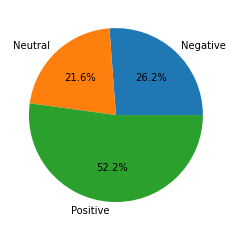

In [9]:
label = ['Negative', 'Neutral', 'Positive']
plt.pie(df_maruti.groupby('sentiment')['sentiment'].count(), autopct="%.1f%%", labels=label)
plt.show()

In [10]:
df_tata = df[df['companies']=='Tata Motors']
df_tata['sentiment'].value_counts()

Positive    285
Negative    135
Neutral      67
Name: sentiment, dtype: int64

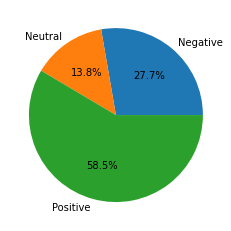

In [11]:
label = ['Negative', 'Neutral', 'Positive']
plt.pie(df_tata.groupby('sentiment')['sentiment'].count(), autopct="%.1f%%", labels=label)
plt.show()

In [12]:
df_mah = df[df['companies']=='Mahindra & Mahindra']
df_mah['sentiment'].value_counts()

Positive    241
Negative     92
Neutral      84
Name: sentiment, dtype: int64

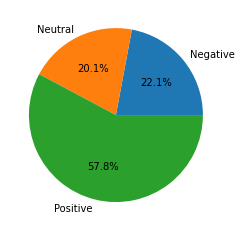

In [13]:
label = ['Negative', 'Neutral', 'Positive']
plt.pie(df_mah.groupby('sentiment')['sentiment'].count(), autopct="%.1f%%", labels=label)
plt.show()

#### Visualising the Data

In [14]:
sent_map={0:'Negative sentiment', 1:'Positive Sentiment', 2:'Neutral Sentiment'}

In [15]:
import warnings
warnings.filterwarnings('ignore')

Positive    767
Negative    348
Neutral     251
Name: sentiment, dtype: int64


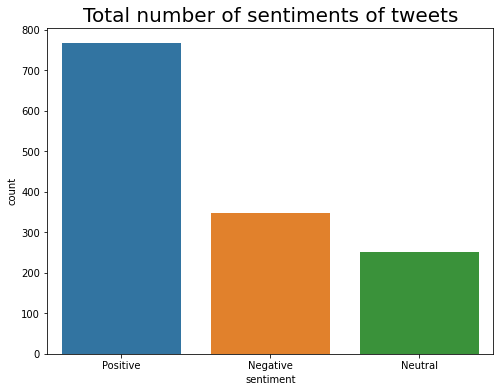

In [16]:
#cprint("Total number of sentiments of tweets :",'green')
print(df.sentiment.value_counts())
plt.figure(figsize=(8, 6))
ax = sns.countplot(x ='sentiment', data = df)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20) 
plt.show()

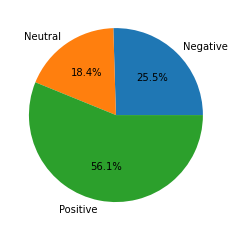

In [17]:
label = ['Negative', 'Neutral', 'Positive']
plt.pie(df.groupby('sentiment')['sentiment'].count(), autopct="%.1f%%", labels=label)
plt.show()

Text(0, 0.5, 'Number of tweets')

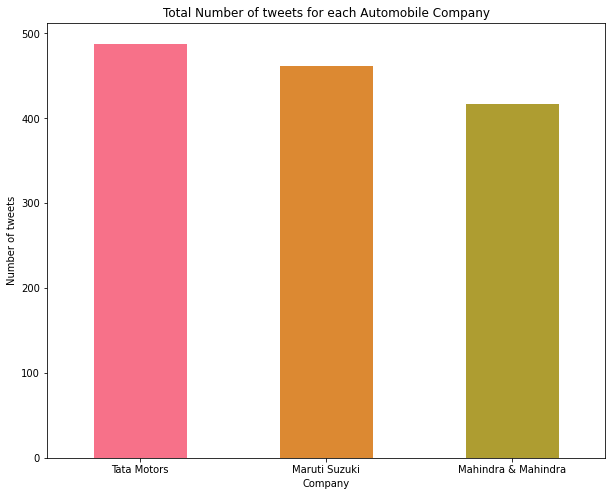

In [18]:
colors = sns.color_palette('husl', 10)
pd.Series(df['companies']).value_counts().plot(kind='bar', color=colors, figsize=(10,8), fontsize=10, rot=0, title='Total Number of tweets for each Automobile Company')
plt.xlabel('Company', fontsize=10)
plt.ylabel('Number of tweets', fontsize = 10)

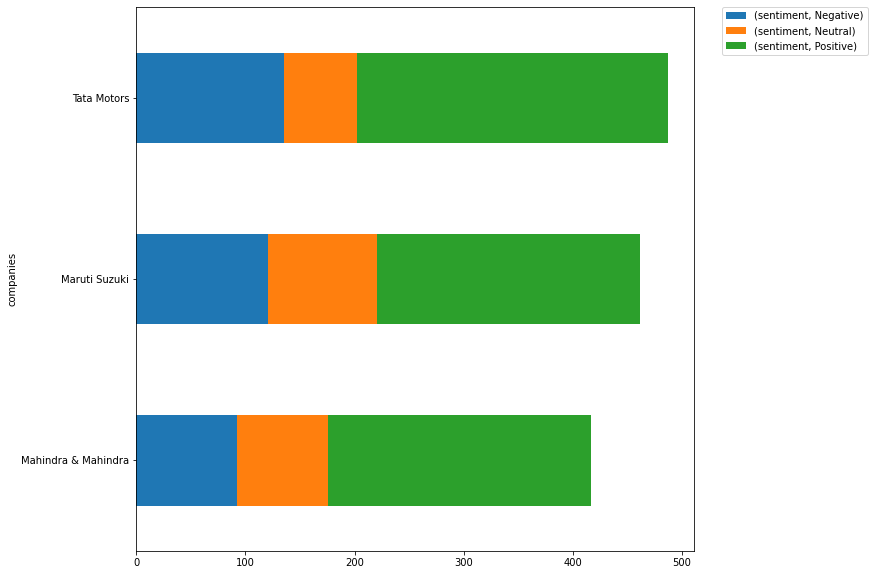

In [19]:
pd.DataFrame(df.groupby('companies')['sentiment'].value_counts()).unstack().plot.barh(figsize=(10,10), stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

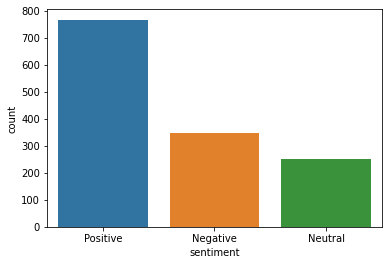

In [20]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

### Word Counts

In [21]:
df['tweet'][2]

'We would like to categorically state that these communications are purely made with the intent to defraud the publiÃ\x83Â¢Ã¢Â\x82Â¬Ã\x82Â¦ '

In [22]:
df['word_counts']=df['tweet'].apply(lambda x:len(str(x).split()))
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts
0,1,Positive,Maruti_Suzuki \nBig breakout done at 9100\nSu...,Maruti Suzuki,17
1,2,Negative,Maruti suzuki connect service is very poor and...,Maruti Suzuki,17
2,3,Negative,We would like to categorically state that thes...,Maruti Suzuki,19
3,4,Negative,- the actual interviews. These individuals/rec...,Maruti Suzuki,14
4,5,Positive,Enjoy the outside view and the landscape as th...,Maruti Suzuki,22


### Converting HTML entities

In [23]:
# Converting html entities i.e. (&lt; is converted to "<" and &amp; is converted to "&")
from html.parser import HTMLParser

In [24]:
html_parser = HTMLParser()

In [25]:
df['tweet'] = df['tweet'].apply(lambda x: html_parser.unescape(x))
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts
0,1,Positive,Maruti_Suzuki \nBig breakout done at 9100\nSu...,Maruti Suzuki,17
1,2,Negative,Maruti suzuki connect service is very poor and...,Maruti Suzuki,17
2,3,Negative,We would like to categorically state that thes...,Maruti Suzuki,19
3,4,Negative,- the actual interviews. These individuals/rec...,Maruti Suzuki,14
4,5,Positive,Enjoy the outside view and the landscape as th...,Maruti Suzuki,22


### Cleaning and removing punctuations

In [26]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
  translator = str.maketrans('', '', punctuations_list)
  return text.translate(translator)

#applying the function to our dataset
df['tweet'] = df['tweet'].apply(lambda x: cleaning_punctuations(x))
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts
0,1,Positive,MarutiSuzuki \nBig breakout done at 9100\nSus...,Maruti Suzuki,17
1,2,Negative,Maruti suzuki connect service is very poor and...,Maruti Suzuki,17
2,3,Negative,We would like to categorically state that thes...,Maruti Suzuki,19
3,4,Negative,the actual interviews These individualsrecrui...,Maruti Suzuki,14
4,5,Positive,Enjoy the outside view and the landscape as th...,Maruti Suzuki,22


### Cleaning and Removing repeating characters

In [27]:
def cleaning_repeating_char(text):
  return re.sub(r'(.)1+', r'1', text)
df['tweet'] = df['tweet'].apply(lambda x: cleaning_repeating_char(x))
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts
0,1,Positive,MarutiSuzuki \nBig breakout done at 100\nSust...,Maruti Suzuki,17
1,2,Negative,Maruti suzuki connect service is very poor and...,Maruti Suzuki,17
2,3,Negative,We would like to categorically state that thes...,Maruti Suzuki,19
3,4,Negative,the actual interviews These individualsrecrui...,Maruti Suzuki,14
4,5,Positive,Enjoy the outside view and the landscape as th...,Maruti Suzuki,22


### Cleaning and Removing Numerics

In [28]:
def cleaning_numbers(data):
  return re.sub('[0-9]+', '', data)

df['tweet'] = df['tweet'].apply(lambda x: cleaning_numbers(x))
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts
0,1,Positive,MarutiSuzuki \nBig breakout done at \nSustain...,Maruti Suzuki,17
1,2,Negative,Maruti suzuki connect service is very poor and...,Maruti Suzuki,17
2,3,Negative,We would like to categorically state that thes...,Maruti Suzuki,19
3,4,Negative,the actual interviews These individualsrecrui...,Maruti Suzuki,14
4,5,Positive,Enjoy the outside view and the landscape as th...,Maruti Suzuki,22


### Case Folding (converting tweets into lowercase)

In [29]:
df['tweet'] = df['tweet'].apply(lambda x: x.lower())
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts
0,1,Positive,marutisuzuki \nbig breakout done at \nsustain...,Maruti Suzuki,17
1,2,Negative,maruti suzuki connect service is very poor and...,Maruti Suzuki,17
2,3,Negative,we would like to categorically state that thes...,Maruti Suzuki,19
3,4,Negative,the actual interviews these individualsrecrui...,Maruti Suzuki,14
4,5,Positive,enjoy the outside view and the landscape as th...,Maruti Suzuki,22


### Removing words with length 1

In [30]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df['tweet'].head()

0    marutisuzuki big breakout done at sustain abov...
1    maruti suzuki connect service is very poor and...
2    we would like to categorically state that thes...
3    the actual interviews these individualsrecruit...
4    enjoy the outside view and the landscape as th...
Name: tweet, dtype: object

### Replacing Special Characters with space

In [31]:
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x))
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts
0,1,Positive,marutisuzuki big breakout done at sustain abov...,Maruti Suzuki,17
1,2,Negative,maruti suzuki connect service is very poor and...,Maruti Suzuki,17
2,3,Negative,we would like to categorically state that thes...,Maruti Suzuki,19
3,4,Negative,the actual interviews these individualsrecruit...,Maruti Suzuki,14
4,5,Positive,enjoy the outside view and the landscape as th...,Maruti Suzuki,22


### Stop words Removal

In [32]:
# Removing stopwords using spacy

df['tweet'] = df['tweet'].apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))

In [33]:
df['tweet'].head()

0    marutisuzuki big breakout sustain buy breakout...
1    maruti suzuki connect service poor service pro...
2    like categorically state communications purely...
3    actual interviews individualsrecruitment compa...
4    enjoy outside view landscape new brezza comes ...
Name: tweet, dtype: object

In [34]:
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts
0,1,Positive,marutisuzuki big breakout sustain buy breakout...,Maruti Suzuki,17
1,2,Negative,maruti suzuki connect service poor service pro...,Maruti Suzuki,17
2,3,Negative,like categorically state communications purely...,Maruti Suzuki,19
3,4,Negative,actual interviews individualsrecruitment compa...,Maruti Suzuki,14
4,5,Positive,enjoy outside view landscape new brezza comes ...,Maruti Suzuki,22


### Short word lookup

In [35]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [36]:
def lookup_dict(text, dictionary):
  for word in text.split():
    if word.lower() in dictionary:
      if word.lower() in text.split():
        text = text.replace(word, dictionary[word.lower()])
  return text

In [37]:
df['tweet'] = df['tweet'].apply(lambda x: lookup_dict(x, short_word_dict))
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts
0,1,Positive,marutisuzuki big breakout sustain buy breakout...,Maruti Suzuki,17
1,2,Negative,maruti suzuki connect service poor service pro...,Maruti Suzuki,17
2,3,Negative,like categorically state communications purely...,Maruti Suzuki,19
3,4,Negative,actual interviews individualsrecruitment compa...,Maruti Suzuki,14
4,5,Positive,enjoy outside view landscape new brezza comes ...,Maruti Suzuki,22


### Word Tokenisation

In [38]:
# Importing stop words from NLTK corpus and word tokenizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [39]:
# creating token for clean tweets

df['tweet_token'] = df['tweet'].apply(lambda x: word_tokenize(x))

## Fully formatted tweets and their tokens
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts,tweet_token
0,1,Positive,marutisuzuki big breakout sustain buy breakout...,Maruti Suzuki,17,"[marutisuzuki, big, breakout, sustain, buy, br..."
1,2,Negative,maruti suzuki connect service poor service pro...,Maruti Suzuki,17,"[maruti, suzuki, connect, service, poor, servi..."
2,3,Negative,like categorically state communications purely...,Maruti Suzuki,19,"[like, categorically, state, communications, p..."
3,4,Negative,actual interviews individualsrecruitment compa...,Maruti Suzuki,14,"[actual, interviews, individualsrecruitment, c..."
4,5,Positive,enjoy outside view landscape new brezza comes ...,Maruti Suzuki,22,"[enjoy, outside, view, landscape, new, brezza,..."


### Stop Word Removal

In [40]:
# Removing stopwords using spacy
df['tweet_token'] = df['tweet_token'].apply(lambda x: ([t for t in x if t not in STOP_WORDS]))

In [41]:
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts,tweet_token
0,1,Positive,marutisuzuki big breakout sustain buy breakout...,Maruti Suzuki,17,"[marutisuzuki, big, breakout, sustain, buy, br..."
1,2,Negative,maruti suzuki connect service poor service pro...,Maruti Suzuki,17,"[maruti, suzuki, connect, service, poor, servi..."
2,3,Negative,like categorically state communications purely...,Maruti Suzuki,19,"[like, categorically, state, communications, p..."
3,4,Negative,actual interviews individualsrecruitment compa...,Maruti Suzuki,14,"[actual, interviews, individualsrecruitment, c..."
4,5,Positive,enjoy outside view landscape new brezza comes ...,Maruti Suzuki,22,"[enjoy, outside, view, landscape, new, brezza,..."


### Text Analysis

#### Lexicon based approach
#### Vader

In [42]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(" ".join(df.tweet_token[0]))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'compound': -0.5423, 'neg': 0.333, 'neu': 0.667, 'pos': 0.0}

In [43]:
texts = [" ".join(df.tweet_token[i]) for i in range(len(df))]

print(df.tweet[0])
print(texts[0])
print(vader.polarity_scores(texts[0]), f'--> Actual Classification: {df.sentiment[0]}','\n')

marutisuzuki big breakout sustain buy breakout fail shar
marutisuzuki big breakout sustain buy breakout fail shar
{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423} --> Actual Classification: Positive 



### Sentence Normalisation using Stemming and Lemmatization


#### We will create two new columns for Stemming and Lemmatization 
##### The difference between stemming and Lemmatization is that lemmatization considers the context and converts the word to its meaningful base form, while stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

### **Stemming** - Refers to the removal of suffices like "ing", "ly", "s", etc by a simple rule-based approach

In [44]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [45]:
# Creating a column tweet_stemmed to show the tweet's stemmed version
df['tweet_stemmed'] = df['tweet_token'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts,tweet_token,tweet_stemmed
0,1,Positive,marutisuzuki big breakout sustain buy breakout...,Maruti Suzuki,17,"[marutisuzuki, big, breakout, sustain, buy, br...",marutisuzuki big breakout sustain buy breakout...
1,2,Negative,maruti suzuki connect service poor service pro...,Maruti Suzuki,17,"[maruti, suzuki, connect, service, poor, servi...",maruti suzuki connect servic poor servic provi...
2,3,Negative,like categorically state communications purely...,Maruti Suzuki,19,"[like, categorically, state, communications, p...",like categor state commun pure intent defraud ...
3,4,Negative,actual interviews individualsrecruitment compa...,Maruti Suzuki,14,"[actual, interviews, individualsrecruitment, c...",actual interview individualsrecruit compani wr...
4,5,Positive,enjoy outside view landscape new brezza comes ...,Maruti Suzuki,22,"[enjoy, outside, view, landscape, new, brezza,...",enjoy outsid view landscap new brezza come ele...


### **Lemmatization** - It is the process of converting a word to its base form 

In [46]:
# Importing libraries for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lm = WordNetLemmatizer()

In [47]:
# Creating a column tweet_lemmatized to show the tweet's lemmatized version

def lemmatizer_on_text(data):
  text = [lm.lemmatize(word) for word in data]
  return data

df['tweet_lemmatized'] = df['tweet_stemmed'].apply(lambda x: lemmatizer_on_text(x))
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts,tweet_token,tweet_stemmed,tweet_lemmatized
0,1,Positive,marutisuzuki big breakout sustain buy breakout...,Maruti Suzuki,17,"[marutisuzuki, big, breakout, sustain, buy, br...",marutisuzuki big breakout sustain buy breakout...,marutisuzuki big breakout sustain buy breakout...
1,2,Negative,maruti suzuki connect service poor service pro...,Maruti Suzuki,17,"[maruti, suzuki, connect, service, poor, servi...",maruti suzuki connect servic poor servic provi...,maruti suzuki connect servic poor servic provi...
2,3,Negative,like categorically state communications purely...,Maruti Suzuki,19,"[like, categorically, state, communications, p...",like categor state commun pure intent defraud ...,like categor state commun pure intent defraud ...
3,4,Negative,actual interviews individualsrecruitment compa...,Maruti Suzuki,14,"[actual, interviews, individualsrecruitment, c...",actual interview individualsrecruit compani wr...,actual interview individualsrecruit compani wr...
4,5,Positive,enjoy outside view landscape new brezza comes ...,Maruti Suzuki,22,"[enjoy, outside, view, landscape, new, brezza,...",enjoy outsid view landscap new brezza come ele...,enjoy outsid view landscap new brezza come ele...


In [48]:
# drop all rows with any NaN and NaT values
df = df.dropna()
print(df)

      Ã¯Â»Â¿id sentiment                                              tweet  \
0            1  Positive  marutisuzuki big breakout sustain buy breakout...   
1            2  Negative  maruti suzuki connect service poor service pro...   
2            3  Negative  like categorically state communications purely...   
3            4  Negative  actual interviews individualsrecruitment compa...   
4            5  Positive  enjoy outside view landscape new brezza comes ...   
...        ...       ...                                                ...   
1362      1502  Positive  way stopping mahindra dealerships major cities...   
1363      1503  Positive  sa todays immunity challenge tactical mahindra...   
1364      1504  Positive  set showcase future electric offerings virtual...   
1365      1505   Neutral  mahindra scorpio classic spied ahead launch cu...   
1366      1506  Positive  strategic global expansion mahindra mahindra w...   

                companies  word_counts  \
0        

### Text can now be analysed on the cleaned data

##### We will do our analysis on two columns i.e. 'tweet_stemmed' and 'tweet_lemmatized'

##### A - Will see the most commonly used words for both the above columns

#### Creating three different dfs for each company's positive word cloud

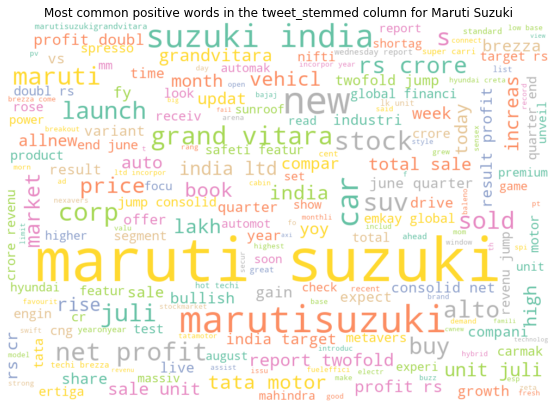

In [49]:
maruti_df = df[df["companies"] == 'Maruti Suzuki']
maruti_pos_df = maruti_df[maruti_df['sentiment'] == 'Positive']
# Visualizing all the words in the column "tweet_stemmed" in our data belonging to Maruti Suzuki using the wordcloud

from wordcloud import WordCloud

all_words=' '.join([text for text in maruti_pos_df['tweet_stemmed']])

wordcloud = WordCloud(background_color ='white', width = 1000, height = 700, colormap = 'Set2', random_state= 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common positive words in the tweet_stemmed column for Maruti Suzuki")
plt.show()


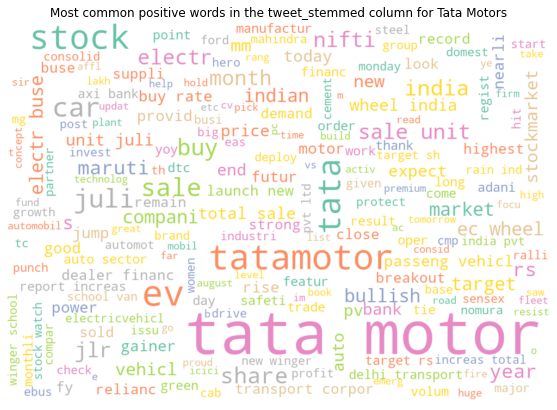

In [50]:
# Visualising the word cloud for Tata Motors

Tata_df = df[df["companies"]=='Tata Motors']
tata_pos_df = Tata_df[Tata_df["sentiment"] == 'Positive']
all_words=' '.join([text for text in tata_pos_df['tweet_stemmed']])

wordcloud = WordCloud(background_color ='white', width = 1000, height = 700, colormap = 'Set2', random_state= 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common positive words in the tweet_stemmed column for Tata Motors")
plt.show()


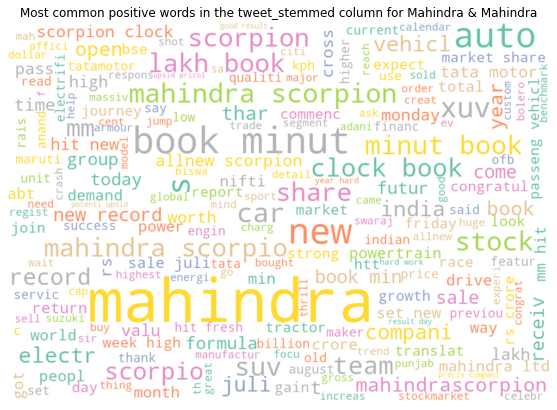

In [51]:
# Visualising the word cloud for Mahindra & Mahindra

Mah_df = df[df["companies"]=='Mahindra & Mahindra']
Mah_pos_df = Mah_df[Mah_df["sentiment"] == 'Positive']
all_words=' '.join([text for text in Mah_pos_df['tweet_stemmed']])

wordcloud = WordCloud(background_color ='white', width = 1000, height = 700, colormap = 'Set2', random_state= 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common positive words in the tweet_stemmed column for Mahindra & Mahindra")
plt.show()

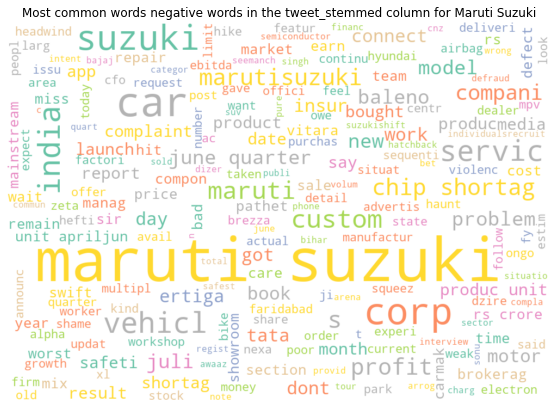

In [52]:
# Visualising the negative word cloud for each company

maruti_df = df[df["companies"] == 'Maruti Suzuki']
maruti_neg_df = maruti_df[maruti_df['sentiment'] == 'Negative']
# Visualizing all the words in the column "tweet_stemmed" in our data belonging to Maruti Suzuki using the wordcloud

from wordcloud import WordCloud

all_words=' '.join([text for text in maruti_neg_df['tweet_stemmed']])

wordcloud = WordCloud(background_color ='white', width = 1000, height = 700, colormap = 'Set2', random_state= 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words negative words in the tweet_stemmed column for Maruti Suzuki")
plt.show()

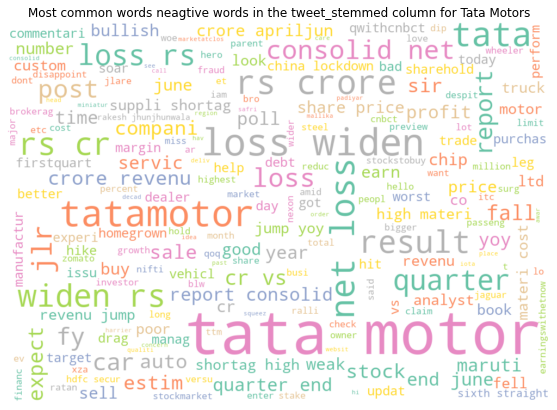

In [53]:
# Visualising the negative word cloud for Tata Motors

tata_df = df[df["companies"] == 'Tata Motors']
tata_neg_df = tata_df[tata_df['sentiment'] == 'Negative']
# Visualizing all the words in the column "tweet_stemmed" in our data belonging to Maruti Suzuki using the wordcloud

from wordcloud import WordCloud

all_words=' '.join([text for text in tata_neg_df['tweet_stemmed']])

wordcloud = WordCloud(background_color ='white', width = 1000, height = 700, colormap = 'Set2', random_state= 21, max_font_size = 110).generate(all_words)


plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words neagtive words in the tweet_stemmed column for Tata Motors")
plt.show()

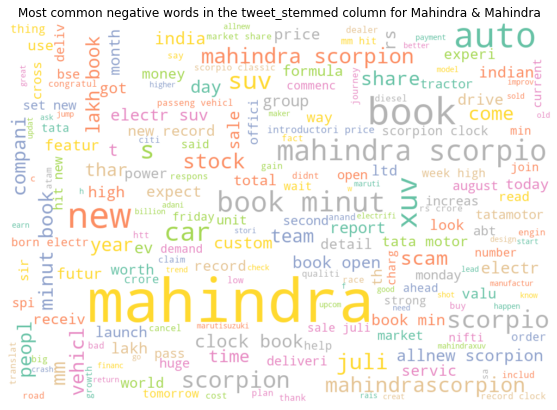

In [54]:
# Visualising the negative word cloud for Mahindra & Mahindra

mah_df = df[df["companies"] == 'Mahindra & Mahindra']
mah_neg_df = mah_df[mah_df['sentiment'] == 'Negative']
# Visualizing all the words in the column "tweet_stemmed" in our data belonging to Maruti Suzuki using the wordcloud

from wordcloud import WordCloud

all_words=' '.join([text for text in mah_df['tweet_stemmed']])

wordcloud = WordCloud(background_color ='white', width = 1000, height = 700, colormap = 'Set2', random_state= 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common negative words in the tweet_stemmed column for Mahindra & Mahindra")
plt.show()

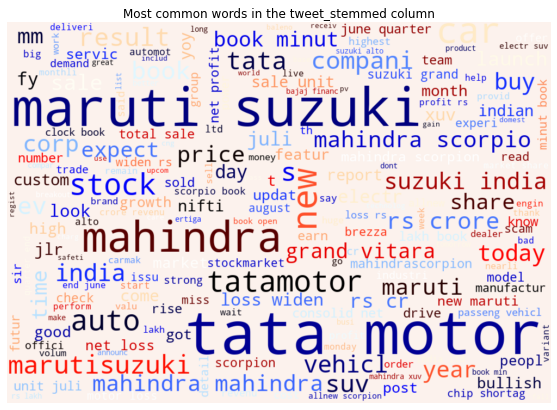

In [55]:
# Visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot

all_words = ' '.join([text for text in df['tweet_stemmed']])

from wordcloud import WordCloud

# generating a word cloud image
wordcloud = WordCloud(background_color ='#fcf2ed', width = 1000, height = 700, colormap = 'flag', random_state= 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words in the tweet_stemmed column")
plt.show()

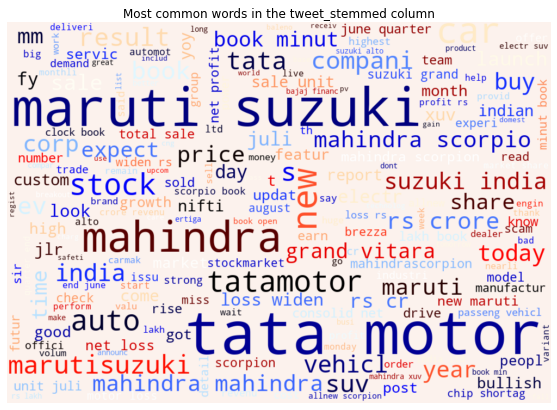

In [56]:
# Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot

all_words = ' '.join([text for text in df['tweet_lemmatized']])

# generating a word cloud image
wordcloud = WordCloud(background_color ='#fcf2ed', width = 1000, height = 700, colormap = 'flag', random_state= 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words in the tweet_stemmed column")
plt.show()

## Extracting features from PreProcessed Tweets

#### Changing the labels into integers

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.sentiment)
df['target'] = le.transform(df.sentiment)

##### Selecting the text and target columns for further analysis


In [58]:
X = df.tweet_stemmed
y = df.target

### Transforming dataset using Tf-Idf Vectorizer

In [59]:
#Importing Library

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)

# Fit the TF-IDF Vectorizer

vectorizer.fit(X)

X_final = vectorizer.transform(X)

print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  10000


In [60]:
# Transform the data using TF-IDF Vectorizer
#X_train = vectorizer.transform(X_train)
#X_test = vectorizer.transform(X_test)


### Splitting Data into train and test

In [61]:
# Splitting the data into training and validation set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25, random_state = 3)


## Twitter Sentiment Analysis

In [62]:
df.head()

,Ã¯Â»Â¿id,sentiment,tweet,companies,word_counts,tweet_token,tweet_stemmed,tweet_lemmatized,target
0,1,Positive,marutisuzuki big breakout sustain buy breakout...,Maruti Suzuki,17,"[marutisuzuki, big, breakout, sustain, buy, br...",marutisuzuki big breakout sustain buy breakout...,marutisuzuki big breakout sustain buy breakout...,2
1,2,Negative,maruti suzuki connect service poor service pro...,Maruti Suzuki,17,"[maruti, suzuki, connect, service, poor, servi...",maruti suzuki connect servic poor servic provi...,maruti suzuki connect servic poor servic provi...,0
2,3,Negative,like categorically state communications purely...,Maruti Suzuki,19,"[like, categorically, state, communications, p...",like categor state commun pure intent defraud ...,like categor state commun pure intent defraud ...,0
3,4,Negative,actual interviews individualsrecruitment compa...,Maruti Suzuki,14,"[actual, interviews, individualsrecruitment, c...",actual interview individualsrecruit compani wr...,actual interview individualsrecruit compani wr...,0
4,5,Positive,enjoy outside view landscape new brezza comes ...,Maruti Suzuki,22,"[enjoy, outside, view, landscape, new, brezza,...",enjoy outsid view landscap new brezza come ele...,enjoy outsid view landscap new brezza come ele...,2


### Function for Model Evaluation

###..

###After training the model we apply the following evaluation measures to check how the models are performing. Accordingly we use the following evaluation parameters to check the performance of the models respectively

#### 1) Accuracy Score
#### 2) Precision
#### 3) Recall
#### 4) Confusion Matrix


In [63]:
def model_Evaluate(model):
# Predict values for Test dataset
 y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset
 print(classification_report(y_test, y_pred))
 accuracy = accuracy_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred, average = 'macro')
 recall = recall_score(y_test, y_pred, average = 'macro')
 f1score = f1_score(y_test, y_pred, average ='macro')
 print('accuracy = %0.3f, precision = %0.3f, recall = %0.3f, f1_score = %0.3f' % (accuracy, precision, recall, f1score))
# Compute and plot the confusion matrix
 cf_matrix = confusion_matrix(y_test, y_pred)
 categories = ['Negative', 'Positive', 'Neutral']
 group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
 group_percentages = ['{0:2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
 labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
 labels = np.asarray(labels).reshape(2,2)
 sns.heatmap(cf_matrix, annot = True, cmap = 'Blues', fmt = '',
             xticklabels = categories, yticklabels= categories)
 plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
 plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
 confusion_mat = confusion_matrix(y_test, y_pred)

 #plt.title( "Confusion Matrix", fontdict = {'size': 18}, labelpad = 20)

## Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.94      0.17      0.29        86
           1       0.00      0.00      0.00        61
           2       0.60      0.99      0.74       195

    accuracy                           0.61       342
   macro avg       0.51      0.39      0.35       342
weighted avg       0.58      0.61      0.50       342

accuracy = 0.611, precision = 0.511, recall = 0.390, f1_score = 0.346


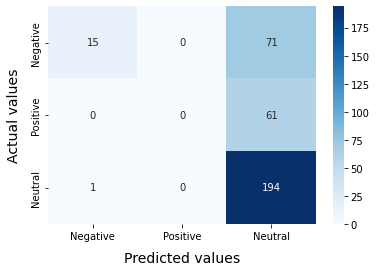

In [64]:
#Importing Library
from sklearn.naive_bayes import BernoulliNB

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
#score_metrics(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

### Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       0.86      0.57      0.69        86
           1       0.69      0.30      0.41        61
           2       0.71      0.95      0.81       195

    accuracy                           0.74       342
   macro avg       0.76      0.60      0.64       342
weighted avg       0.75      0.74      0.71       342

accuracy = 0.737, precision = 0.755, recall = 0.605, f1_score = 0.638


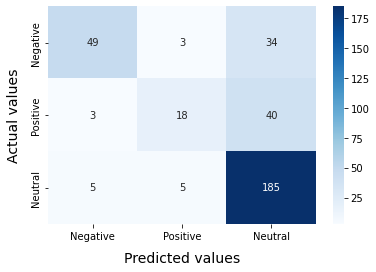

In [65]:
# Importing Library
from sklearn.svm import LinearSVC

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

### Logistic Regression model 

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        86
           1       0.85      0.18      0.30        61
           2       0.66      0.97      0.78       195

    accuracy                           0.69       342
   macro avg       0.79      0.52      0.55       342
weighted avg       0.75      0.69      0.64       342

accuracy = 0.690, precision = 0.793, recall = 0.523, f1_score = 0.549


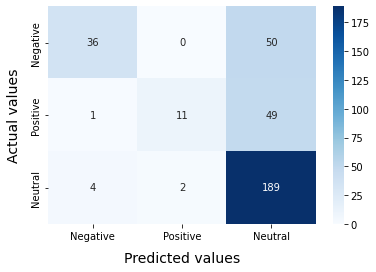

In [66]:
#Importing Libraries
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(C = 2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

### K-Nearest Neighbours Classifier

In [67]:
#Importing Libraries

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = {'n_neighbors' : [40,50,60,70,80,90],
               'metric' : ['manhattan']}

knn = KNeighborsClassifier()
clf = RandomizedSearchCV(knn, grid_params, random_state=0, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['manhattan'],
                                        'n_neighbors': [40, 50, 60, 70, 80,
                                                        90]},
                   random_state=0, verbose=1)

              precision    recall  f1-score   support

           0       0.64      0.24      0.35        86
           1       0.00      0.00      0.00        61
           2       0.61      0.96      0.74       195

    accuracy                           0.61       342
   macro avg       0.41      0.40      0.37       342
weighted avg       0.51      0.61      0.51       342

accuracy = 0.608, precision = 0.414, recall = 0.401, f1_score = 0.365


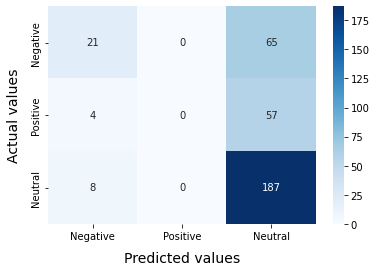

In [68]:
# Evaluation of the model

model_Evaluate(clf)
y_pred4 = clf.predict(X_test)

### Decision Trees

In [69]:
# Importing Libraries

from sklearn.tree import DecisionTreeClassifier

# Fitting the model
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state = 32)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=32)

              precision    recall  f1-score   support

           0       0.51      0.49      0.50        86
           1       0.31      0.26      0.29        61
           2       0.68      0.73      0.71       195

    accuracy                           0.59       342
   macro avg       0.50      0.49      0.50       342
weighted avg       0.57      0.59      0.58       342

accuracy = 0.588, precision = 0.503, recall = 0.495, f1_score = 0.498


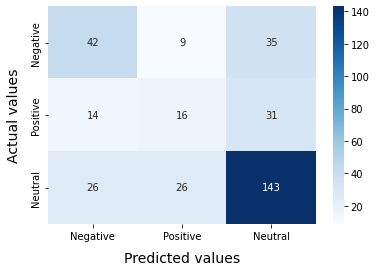

In [70]:
# Evaluating the model

model_Evaluate(dt_classifier)
y_pred5 = dt_classifier.predict(X_test)

### Random Forest

In [71]:
# Importing Libraries

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

# Fitting the model

rdt_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy',
                                        n_jobs=-1, random_state=32)
rdt_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=-1,
                       random_state=32)

              precision    recall  f1-score   support

           0       0.71      0.43      0.54        86
           1       0.48      0.20      0.28        61
           2       0.67      0.91      0.77       195

    accuracy                           0.66       342
   macro avg       0.62      0.51      0.53       342
weighted avg       0.65      0.66      0.62       342

accuracy = 0.661, precision = 0.620, recall = 0.512, f1_score = 0.528


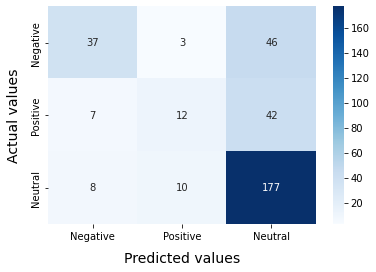

In [72]:
# Evaluating the model

model_Evaluate(rdt_classifier)
y_pred6 = rdt_classifier.predict(X_test)

### We can see that the SVM Classifier gives the highest accuracy of 0.74 on our data

### Introducing Synthetic Minority Over-Sampling Technique (SMOTE)

#### Handling Imbalance


In [73]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(X_final, y)

#### Splitting the data again with the transformed data

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=3)

#### Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       184
           1       0.96      0.92      0.94       180
           2       0.88      0.92      0.90       212

    accuracy                           0.92       576
   macro avg       0.93      0.92      0.93       576
weighted avg       0.92      0.92      0.92       576

accuracy = 0.924, precision = 0.927, recall = 0.924, f1_score = 0.925


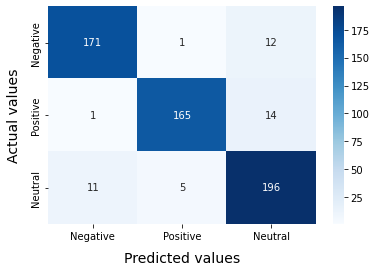

In [75]:
# Fitting the model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

# Evaluating the model
y_pred1 = BNBmodel.predict(X_test)

#### Support Vector Machine

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       184
           1       0.91      0.96      0.94       180
           2       0.92      0.86      0.89       212

    accuracy                           0.91       576
   macro avg       0.91      0.92      0.91       576
weighted avg       0.91      0.91      0.91       576

accuracy = 0.913, precision = 0.913, recall = 0.916, f1_score = 0.914


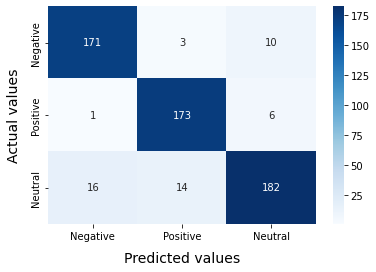

In [76]:
#Fitting the model

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       184
           1       0.90      0.94      0.92       180
           2       0.89      0.86      0.88       212

    accuracy                           0.90       576
   macro avg       0.90      0.91      0.90       576
weighted avg       0.90      0.90      0.90       576

accuracy = 0.903, precision = 0.903, recall = 0.905, f1_score = 0.904


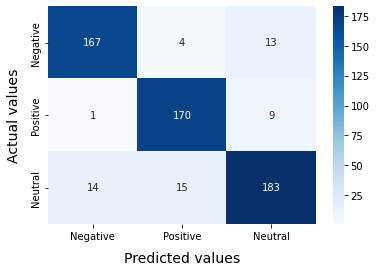

In [77]:
# Fitting the model

LRmodel = LogisticRegression(C = 2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

#### K Nearest Neighbours

In [78]:
# Fitting the model

grid_params = {'n_neighbors' : [40,50,60,70,80,90],
               'metric' : ['manhattan']}

knn = KNeighborsClassifier()
clf = RandomizedSearchCV(knn, grid_params, random_state=0, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['manhattan'],
                                        'n_neighbors': [40, 50, 60, 70, 80,
                                                        90]},
                   random_state=0, verbose=1)

              precision    recall  f1-score   support

           0       0.94      0.24      0.39       184
           1       0.35      0.99      0.52       180
           2       0.94      0.07      0.13       212

    accuracy                           0.41       576
   macro avg       0.74      0.44      0.35       576
weighted avg       0.75      0.41      0.33       576

accuracy = 0.415, precision = 0.742, recall = 0.437, f1_score = 0.346


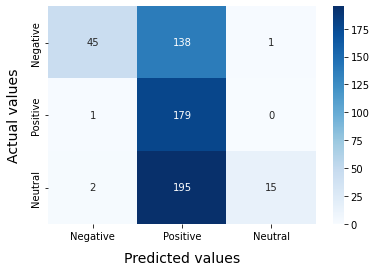

In [79]:
# Evaluation of the model

model_Evaluate(clf)
y_pred4 = clf.predict(X_test)

#### Decision Trees

In [80]:
# Fitting the model
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state = 32)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=32)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       184
           1       0.78      0.73      0.76       180
           2       0.73      0.77      0.75       212

    accuracy                           0.77       576
   macro avg       0.77      0.77      0.77       576
weighted avg       0.77      0.77      0.77       576

accuracy = 0.767, precision = 0.771, recall = 0.767, f1_score = 0.768


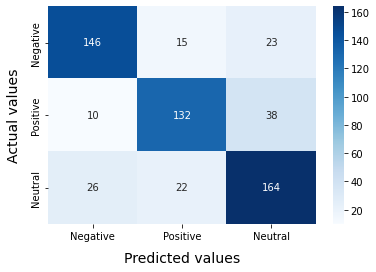

In [81]:
# Evaluating the model

model_Evaluate(dt_classifier)
y_pred5 = dt_classifier.predict(X_test)

#### Random Forest

In [82]:
# Fitting the model
rdt_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy',
                                        n_jobs=-1, random_state=32)
rdt_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=-1,
                       random_state=32)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       184
           1       0.92      0.79      0.85       180
           2       0.75      0.90      0.82       212

    accuracy                           0.84       576
   macro avg       0.86      0.84      0.84       576
weighted avg       0.85      0.84      0.84       576

accuracy = 0.839, precision = 0.856, recall = 0.835, f1_score = 0.841


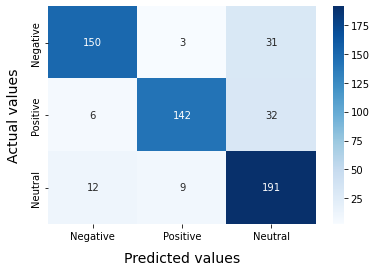

In [83]:
# Evaluating the model

model_Evaluate(rdt_classifier)
y_pred6 = rdt_classifier.predict(X_test)

We can see after applying SMOTE, the accuracy and f1 scores of all the classifiers except K Nearest Neighbours increase. The classifier with the highest accuracy and fi score is Naive Bayes Classifier.
*{the scores will be subject to change since they are sampled differently everytime the code runs, but the comparison will remain the same} 